In [0]:
!pip uninstall numpy -y
!pip install numpy==1.16.2

Uninstalling numpy-1.16.2:
  Successfully uninstalled numpy-1.16.2
  Using cached https://files.pythonhosted.org/packages/35/d5/4f8410ac303e690144f0a0603c4b8fd3b986feb2749c435f7cdbb288f17e/numpy-1.16.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
import numpy as np 
print(np.__version__)
from io import StringIO
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import re

1.16.2


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
mixed_dataset = np.load('/content/drive/My Drive/medGAN/binary_3digit_mixed/binary_3digit_mixed.matrix')
female_dataset = np.load('/content/drive/My Drive/medGAN/binary_3digit_female/binary_3digit_female.matrix')
male_dataset = np.load('/content/drive/My Drive/medGAN/binary_3digit_male/binary_3digit_male.matrix')
mixed_generated = np.load('/content/drive/My Drive/medGAN/binary_3digit_mixed_full.npy')
female_generated = np.load('/content/drive/My Drive/medGAN/binary_3digit_female_full.npy')
male_generated = np.load('/content/drive/My Drive/medGAN/binary_3digit_male_full.npy')

In [0]:
mixed_generated = np.rint(mixed_generated)
female_generated = np.rint(female_generated)
male_generated = np.rint(male_generated)

In [0]:
# Shape before
print(mixed_dataset.shape)
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)

(46520, 1071)
(46000, 1071)
(20399, 987)
(20000, 987)
(26121, 966)
(26000, 966)


In [0]:
print(female_generated[4,:])
#np.rint

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [0]:
mixed_dataset = mixed_dataset[520:]
female_dataset = female_dataset[399:]
male_dataset = male_dataset[121:]

In [0]:
# Shape after
print(mixed_dataset.shape)
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)

(46000, 1071)
(46000, 1071)
(20000, 987)
(20000, 987)
(26000, 966)
(26000, 966)


In [0]:
mixed_prob_dataset = mixed_dataset.sum(axis=0)
mixed_prob_generated = mixed_generated.sum(axis=0)
print(max(mixed_prob_dataset))
dim_prob_mixed = lambda t: t / 46000
vfunc = np.vectorize(dim_prob_mixed)
mixed_prob_dataset = vfunc(mixed_prob_dataset)
mixed_prob_generated = vfunc(mixed_prob_generated)


17851.0


In [0]:
female_prob_dataset = female_dataset.sum(axis=0)
female_prob_generated = female_generated.sum(axis=0)
dim_prob_female = lambda t: t / 20000
vfunc = np.vectorize(dim_prob_female)
female_prob_dataset = vfunc(female_prob_dataset)
female_prob_generated = vfunc(female_prob_generated)

In [0]:
male_prob_dataset = male_dataset.sum(axis=0)
male_prob_generated = male_generated.sum(axis=0)
dim_prob_male = lambda t: t / 26000
vfunc = np.vectorize(dim_prob_male)
male_prob_dataset = vfunc(male_prob_dataset)
male_prob_generated = vfunc(male_prob_generated)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


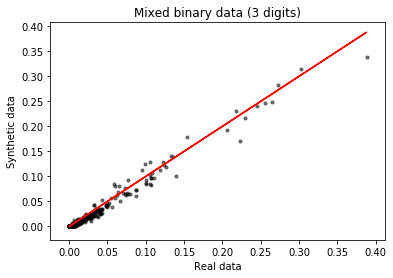

In [0]:
N = 50
x = mixed_prob_dataset
y = mixed_prob_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Mixed binary data (3 digits)')
plt.xlabel('Real data')
plt.ylabel('Synthetic data')
plt.plot(x,x,'r') # identity line
plt.savefig('/content/drive/My Drive/medGAN/binary_3digit_mixed.svg')
plt.show()

In [0]:
N = 50
x = female_prob_dataset
y = female_prob_generated
colors = (0,0,0)
area = np.pi*3

# Plot
fig = plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Female binary data (3 digits)')
plt.xlabel('Real data')
plt.ylabel('Synthetic data')
plt.plot(x,x,'r') # identity line
plt.savefig('/content/drive/My Drive/medGAN/binary_3digit_female.svg')
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


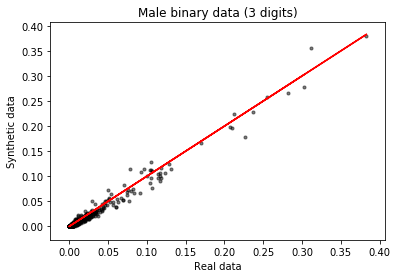

In [0]:
N = 50
x = male_prob_dataset
y = male_prob_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Male binary data (3 digits)')
plt.xlabel('Real data')
plt.ylabel('Synthetic data')
plt.plot(x,x, color='r') # identity line
plt.show()

In [0]:
print(np.max(male_prob_dataset))
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)

1.7020331453955237
(46000, 1071)
(20000, 987)
(20000, 987)
(26000, 966)
(26000, 966)
